### CS156 Assignment 1

#### Dennis Kageni

## Moore's Law

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
import math

import warnings
warnings.simplefilter('ignore') #supress warnings

#### Load and explore data

In [2]:
data = pd.read_csv('benchmarks.txt', low_memory = False)
data.head(5)
# data.loc[: , "testID"]

,testID,benchName,base,peak
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1
1,cpu95-19990104-03254,102.swim,27.20,34.8
2,cpu95-19990104-03254,103.su2cor,10.10,9.98
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61
4,cpu95-19990104-03254,107.mgrid,8.94,9.44


In [3]:
data.info()
# We need to extract the date from testID and convert it into datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136995 entries, 0 to 136994
Data columns (total 4 columns):
testID       136995 non-null object
benchName    136995 non-null object
base         136995 non-null float64
peak         131575 non-null object
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


In [4]:
# find types of benchmarks
pd.unique(data['benchName'])

array(['101.tomcatv', '102.swim', '103.su2cor', '104.hydro2d',
       '107.mgrid', '110.applu', '125.turb3d', '141.apsi', '145.fpppp',
       '146.wave5', '099.go', '124.m88ksim', '126.gcc', '129.compress',
       '130.li', '132.ijpeg', '134.perl', '147.vortex', '168.wupwise',
       '171.swim', '172.mgrid', '173.applu', '177.mesa', '178.galgel',
       '179.art', '183.equake', '187.facerec', '188.ammp', '189.lucas',
       '191.fma3d', '200.sixtrack', '301.apsi', '164.gzip', '175.vpr',
       '176.gcc', '181.mcf', '186.crafty', '197.parser', '252.eon',
       '253.perlbmk', '254.gap', '255.vortex', '256.bzip2', '300.twolf',
       '400.perlbench', '401.bzip2', '403.gcc', '429.mcf', '445.gobmk',
       '456.hmmer', '458.sjeng', '462.libquantum', '464.h264ref',
       '471.omnetpp', '473.astar', '483.xalancbmk', '410.bwaves',
       '416.gamess', '433.milc', '434.zeusmp', '435.gromacs',
       '436.cactusADM', '437.leslie3d', '444.namd', '447.dealII',
       '450.soplex', '453.povray', 

#### Extracting date

In [5]:
date = data['testID']
date = date.str.extract(r'(-[0-9]+-)', expand=False)
data['testID'] = date.str.replace('-', '')
data = data.dropna()


#### Selecting Benchmark

In [6]:
vortex_data = data[data['benchName'] == '147.vortex']
vortex_data['testID'] = vortex_data['testID'].apply(lambda x: pd.to_datetime(x))

vortex_data.tail()

,testID,benchName,base,peak
9309,1998-11-18,147.vortex,9.66,14.7
9317,1998-11-23,147.vortex,21.90,21.9
9335,1998-12-04,147.vortex,26.40,27.8
9343,1998-12-07,147.vortex,19.30,19.3
9371,1998-12-21,147.vortex,27.20,31.8


In [7]:
vortex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 17 to 9371
Data columns (total 4 columns):
testID       494 non-null datetime64[ns]
benchName    494 non-null object
base         494 non-null float64
peak         494 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 19.3+ KB


In [8]:
#sorting by dates
vortex_data = vortex_data.sort_values(by='testID')
vortex_data = vortex_data.sort_index()

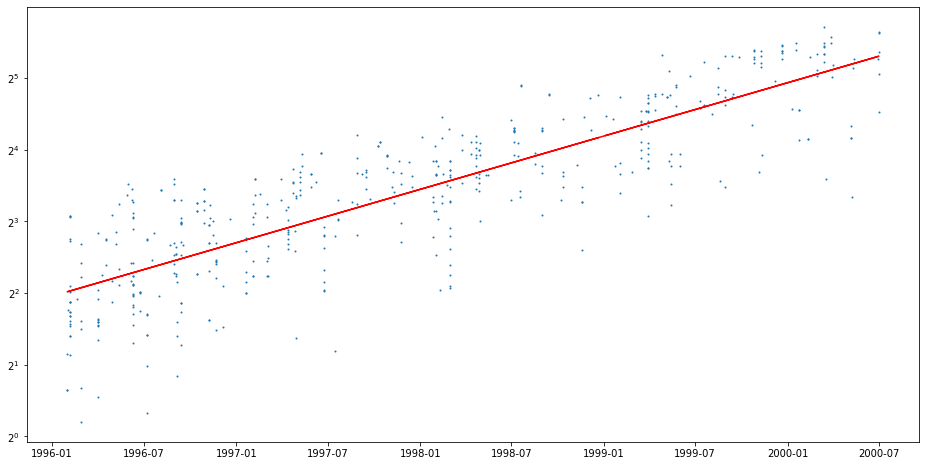

In [9]:
#training linear regression on log of data to fit exponential curve
x = vortex_data['testID']
#converting to ordinal for regression
x2 = pd.to_datetime(vortex_data['testID'])
x2 = x2.map(dt.datetime.toordinal)

y = vortex_data['base']
y2=y.apply(lambda x: math.log(x,2))

slope, intercept, _, _, _ = stats.linregress(x2, y2)
line = 2**(slope*x2+intercept)

#plotting on semi-log graph, exponential fit straightens out
plt.figure(figsize=(16,8))
plt.yscale('log',basey=2)
plt.plot_date(x, y, "o", markersize=1)
plt.plot_date(x, line, '-r')
plt.show()

From the results above, we can see that the base speed is increasing at a rate of roughly 2X units every two years. This is consistent with the doubling phenomenom described in Moore's Law.

 ## MNIST Digits

(1797, 64)


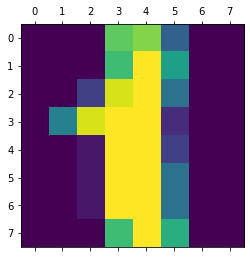

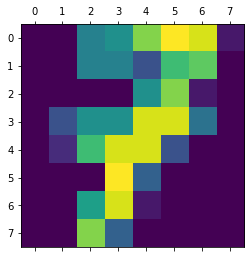

In [10]:
from sklearn.datasets import load_digits
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split 

digits = load_digits()
print(digits.data.shape)
##(1797, 64)

plt.matshow(digits.images[1]) 
plt.matshow(digits.images[7]) 
plt.show() 

In [11]:
X_digits = digits.data / digits.data.max()
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=1)

KNN_classifier = neighbors.KNeighborsClassifier()

print('Accuracy: %f' % KNN_classifier.fit(X_train, y_train).score(X_test, y_test))

Accuracy: 0.993333


In [12]:
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
y_pred = KNN_classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
print(confusion_matrix(y_test, y_pred))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  1  0  0]
 [ 0  0  0 52  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  1]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  1]
 [ 0  0  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        42
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        47
           5       1.00      0.97      0.99        39
           6       1.00      1.00      1.00        43
           7       0.98      0.98      0.98        48
           8       1.00      1.00      1.00        37
           9       0.96      1.00      0.98        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

